In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn import metrics

# Data Description

At this notebook we will git a description of the data, and understand how to utilize this to solve our problem

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_41e49576df68475eae4a7f88b3350cc9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jZiHTY8AX5s3IWdo9Ph8QNhkDfJ4sBO8O7FeDXSjuEYJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_41e49576df68475eae4a7f88b3350cc9.get_object(Bucket='datavisualizationibm-donotdelete-pr-h3htwnwxuvon2n',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_data_1.shape

(194673, 38)

In [5]:
df_data_1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df_data_1.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
pd.options.display.max_columns = 40
df_data_1.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


### Taking the objects types

In [8]:
for col in df_data_1.columns[1:]:
    if(df_data_1[col].dtypes=='object'):
        print(col)
        print(df_data_1[col].unique(),'\n')

REPORTNO
['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008'] 

STATUS
['Matched' 'Unmatched'] 

ADDRTYPE
['Intersection' 'Block' 'Alley' nan] 

LOCATION
['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1'] 

EXCEPTRSNCODE
[' ' nan 'NEI'] 

EXCEPTRSNDESC
[nan 'Not Enough Information, or Insufficient Location Information'] 

SEVERITYDESC
['Injury Collision' 'Property Damage Only Collision'] 

COLLISIONTYPE
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn'] 

INCDATE
['2013/03/27 00:00:00+00' '2006/12/20 00:00:00+00'
 '2004/11/18 00:00:00+00' ... '2020/05/08 00:00:00+00'
 '2020/05/14 00:00:00+00' '2020/05/19 00:00:00+00'] 

INCDTTM
['3/27/2013 2:54:00 PM' '12/20/2006 6:55:00 PM' '11/18/2004 10:20:00 AM'
 ... '1/19/2019 9

In [9]:
# Columns that I'll take off the data
columnsoff = ['REPORTNO','LOCATION','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLDESC','ST_COLCODE','ST_COLDESC']
# Columns that I'll turn into number
columnsNumber = ['STATUS','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']
#Columns that I'll turn into dummies
columnsDummie = ['ADDRTYPE','EXCEPTRSNCODE','COLLISIONTYPE','JUNCTIONTYPE','ROADCOND','LIGHTCOND']

In [10]:
df_data_2 = df_data_1.copy()

In [11]:
df_data_2 = df_data_2.drop(columns=columnsoff)

In [12]:
df_data_2.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,STATUS,ADDRTYPE,INTKEY,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,Matched,Intersection,37475.0,,NaN,2,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,Matched,Block,NaN,NaN,NaN,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,Matched,Block,NaN,NaN,NaN,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,Matched,Block,NaN,,NaN,1,Other,3,0,0,3,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,Matched,Intersection,34387.0,NaN,NaN,2,Angles,2,0,0,2,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,0,0,N


In [13]:
for col in columnsNumber:
    dic = dict()
    for i,j in enumerate(df_data_2[col].unique()):
        dic[j]=i
    df_data_2[col] = df_data_2[col].map(dic)

In [14]:
df_data_2.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,STATUS,ADDRTYPE,INTKEY,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,0,Intersection,37475.0,,NaN,2,Angles,2,0,0,2,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,NaN,0,0,0,0
1,1,-122.347294,47.647172,2,52200,52200,0,Block,NaN,NaN,NaN,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,1,Raining,Wet,Dark - Street Lights On,0,6354039.0,0,0,0,0
2,1,-122.334540,47.607871,3,26700,26700,0,Block,NaN,NaN,NaN,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,1,Overcast,Dry,Daylight,0,4323031.0,0,0,0,0
3,1,-122.334803,47.604803,4,1144,1144,0,Block,NaN,,NaN,1,Other,3,0,0,3,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,NaN,0,0,0,0
4,2,-122.306426,47.545739,5,17700,17700,0,Intersection,34387.0,NaN,NaN,2,Angles,2,0,0,2,At Intersection (intersection related),11,0,1,Raining,Wet,Daylight,0,4028032.0,0,0,0,0


In [15]:
df_data_2 = pd.get_dummies(df_data_2, columns=columnsDummie)

In [16]:
df_data_2.dtypes

SEVERITYCODE            int64
X                     float64
Y                     float64
OBJECTID                int64
INCKEY                  int64
                       ...   
LIGHTCOND_Dawn          uint8
LIGHTCOND_Daylight      uint8
LIGHTCOND_Dusk          uint8
LIGHTCOND_Other         uint8
LIGHTCOND_Unknown       uint8
Length: 64, dtype: object

X


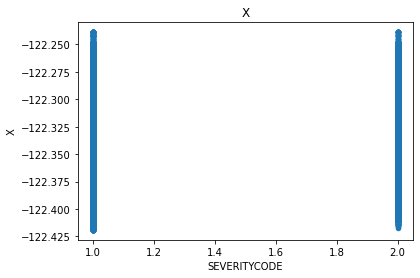

              SEVERITYCODE         X
SEVERITYCODE      1.000000  0.010309
X                 0.010309  1.000000
Y


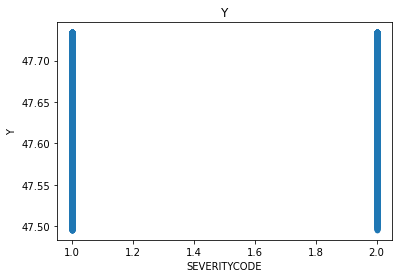

              SEVERITYCODE         Y
SEVERITYCODE      1.000000  0.017737
Y                 0.017737  1.000000
OBJECTID


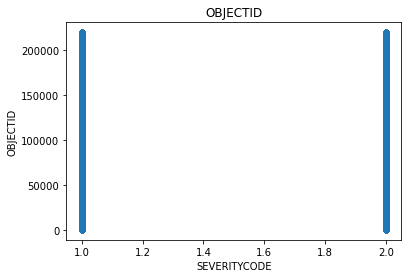

              SEVERITYCODE  OBJECTID
SEVERITYCODE      1.000000  0.020131
OBJECTID          0.020131  1.000000
INCKEY


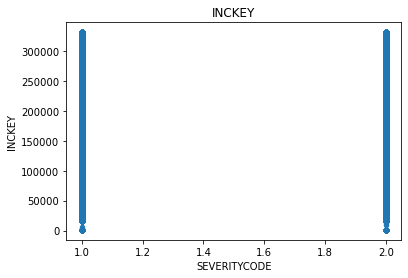

              SEVERITYCODE    INCKEY
SEVERITYCODE      1.000000  0.022065
INCKEY            0.022065  1.000000
COLDETKEY


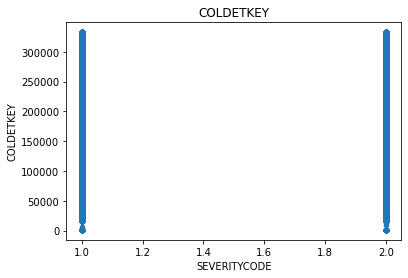

              SEVERITYCODE  COLDETKEY
SEVERITYCODE      1.000000   0.022079
COLDETKEY         0.022079   1.000000
STATUS


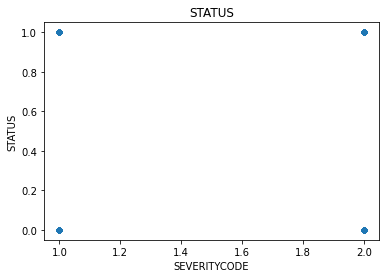

              SEVERITYCODE    STATUS
SEVERITYCODE      1.000000 -0.030967
STATUS           -0.030967  1.000000
INTKEY


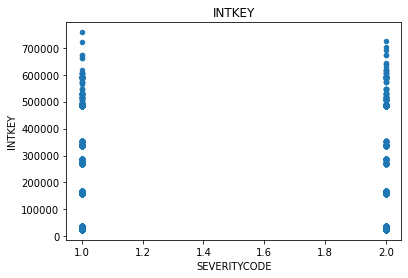

              SEVERITYCODE    INTKEY
SEVERITYCODE      1.000000  0.006553
INTKEY            0.006553  1.000000
SEVERITYCODE.1


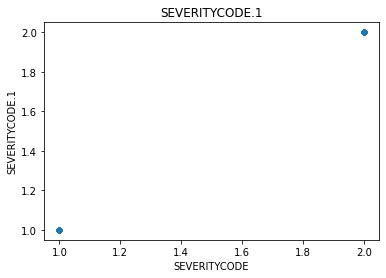

                SEVERITYCODE  SEVERITYCODE.1
SEVERITYCODE             1.0             1.0
SEVERITYCODE.1           1.0             1.0
PERSONCOUNT


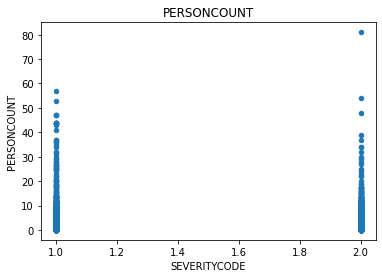

              SEVERITYCODE  PERSONCOUNT
SEVERITYCODE      1.000000     0.130949
PERSONCOUNT       0.130949     1.000000
PEDCOUNT


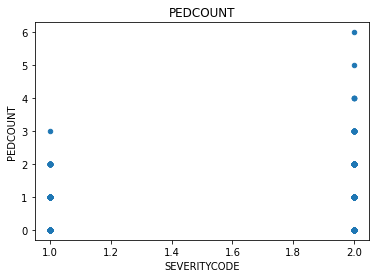

              SEVERITYCODE  PEDCOUNT
SEVERITYCODE      1.000000  0.246338
PEDCOUNT          0.246338  1.000000
PEDCYLCOUNT


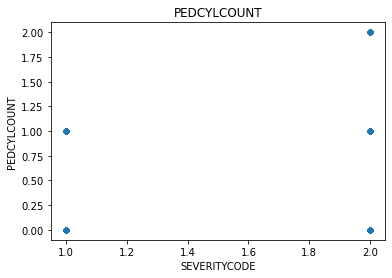

              SEVERITYCODE  PEDCYLCOUNT
SEVERITYCODE      1.000000     0.214218
PEDCYLCOUNT       0.214218     1.000000
VEHCOUNT


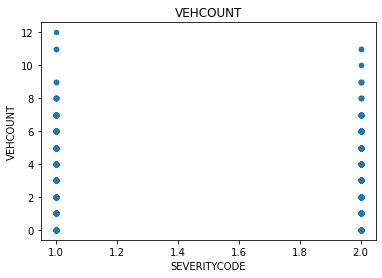

              SEVERITYCODE  VEHCOUNT
SEVERITYCODE      1.000000 -0.054686
VEHCOUNT         -0.054686  1.000000
SDOT_COLCODE


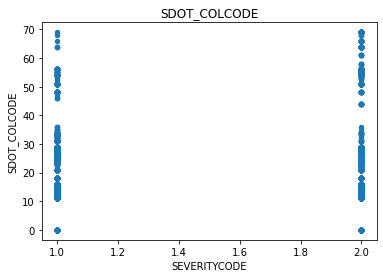

              SEVERITYCODE  SDOT_COLCODE
SEVERITYCODE      1.000000      0.188905
SDOT_COLCODE      0.188905      1.000000
INATTENTIONIND


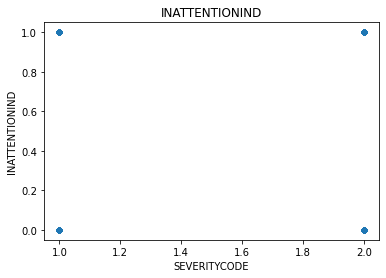

                SEVERITYCODE  INATTENTIONIND
SEVERITYCODE        1.000000        0.046378
INATTENTIONIND      0.046378        1.000000
UNDERINFL


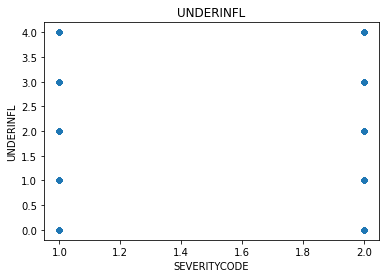

              SEVERITYCODE  UNDERINFL
SEVERITYCODE      1.000000   0.009552
UNDERINFL         0.009552   1.000000
PEDROWNOTGRNT


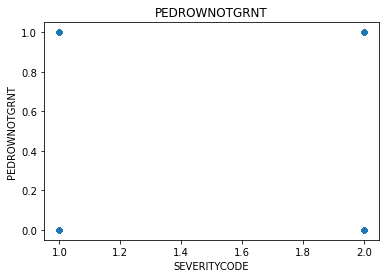

               SEVERITYCODE  PEDROWNOTGRNT
SEVERITYCODE       1.000000       0.206283
PEDROWNOTGRNT      0.206283       1.000000
SDOTCOLNUM


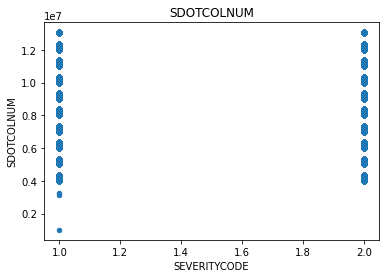

              SEVERITYCODE  SDOTCOLNUM
SEVERITYCODE      1.000000    0.004226
SDOTCOLNUM        0.004226    1.000000
SPEEDING


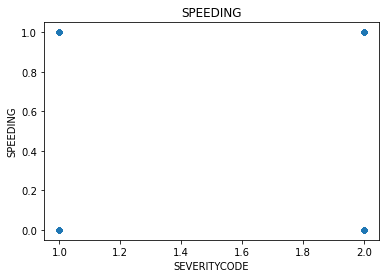

              SEVERITYCODE  SPEEDING
SEVERITYCODE      1.000000  0.038938
SPEEDING          0.038938  1.000000
SEGLANEKEY


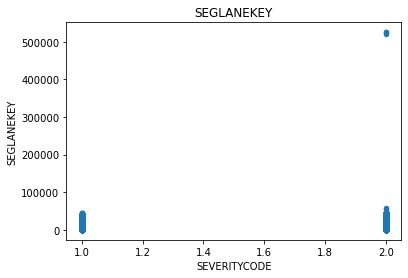

              SEVERITYCODE  SEGLANEKEY
SEVERITYCODE      1.000000    0.104276
SEGLANEKEY        0.104276    1.000000
CROSSWALKKEY


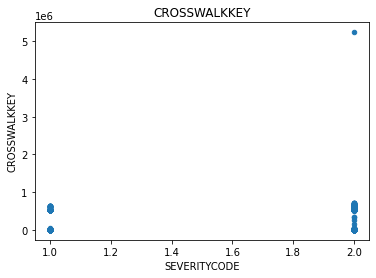

              SEVERITYCODE  CROSSWALKKEY
SEVERITYCODE      1.000000      0.175093
CROSSWALKKEY      0.175093      1.000000
HITPARKEDCAR


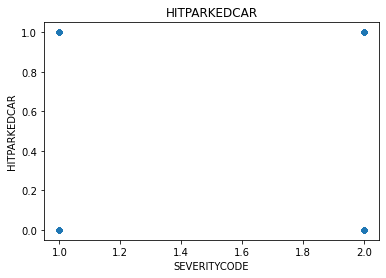

              SEVERITYCODE  HITPARKEDCAR
SEVERITYCODE      1.000000     -0.101498
HITPARKEDCAR     -0.101498      1.000000
ADDRTYPE_Alley


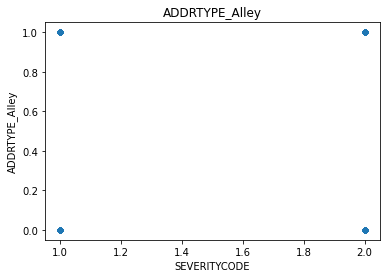

                SEVERITYCODE  ADDRTYPE_Alley
SEVERITYCODE         1.00000        -0.02579
ADDRTYPE_Alley      -0.02579         1.00000
ADDRTYPE_Block


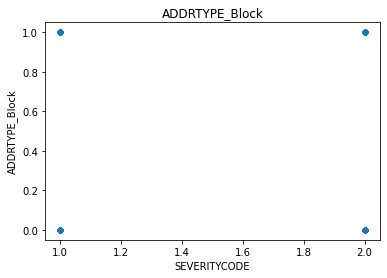

                SEVERITYCODE  ADDRTYPE_Block
SEVERITYCODE        1.000000       -0.184745
ADDRTYPE_Block     -0.184745        1.000000
ADDRTYPE_Intersection


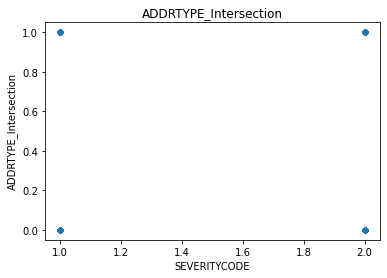

                       SEVERITYCODE  ADDRTYPE_Intersection
SEVERITYCODE               1.000000               0.199089
ADDRTYPE_Intersection      0.199089               1.000000
EXCEPTRSNCODE_ 


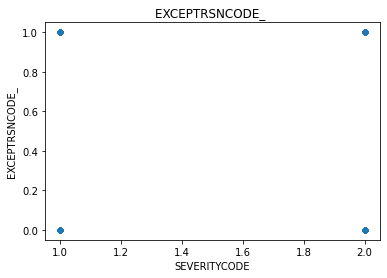

                 SEVERITYCODE  EXCEPTRSNCODE_ 
SEVERITYCODE         1.000000         0.065518
EXCEPTRSNCODE_       0.065518         1.000000
EXCEPTRSNCODE_NEI


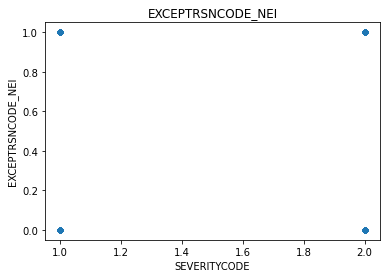

                   SEVERITYCODE  EXCEPTRSNCODE_NEI
SEVERITYCODE           1.000000          -0.078302
EXCEPTRSNCODE_NEI     -0.078302           1.000000
COLLISIONTYPE_Angles


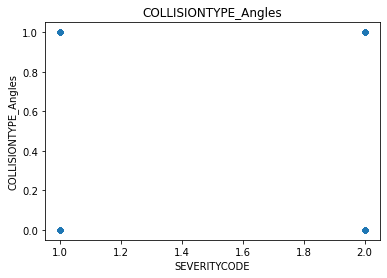

                      SEVERITYCODE  COLLISIONTYPE_Angles
SEVERITYCODE              1.000000              0.095607
COLLISIONTYPE_Angles      0.095607              1.000000
COLLISIONTYPE_Cycles


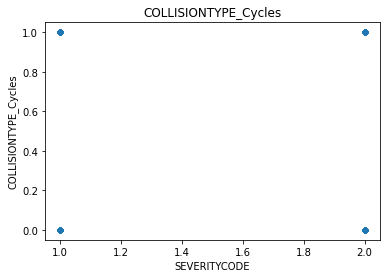

                      SEVERITYCODE  COLLISIONTYPE_Cycles
SEVERITYCODE              1.000000              0.213271
COLLISIONTYPE_Cycles      0.213271              1.000000
COLLISIONTYPE_Head On


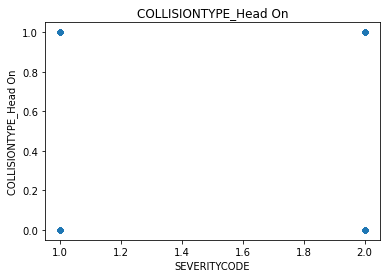

                       SEVERITYCODE  COLLISIONTYPE_Head On
SEVERITYCODE                1.00000                0.02954
COLLISIONTYPE_Head On       0.02954                1.00000
COLLISIONTYPE_Left Turn


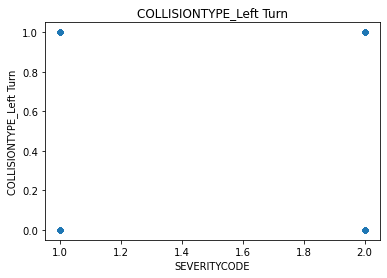

                         SEVERITYCODE  COLLISIONTYPE_Left Turn
SEVERITYCODE                 1.000000                 0.057692
COLLISIONTYPE_Left Turn      0.057692                 1.000000
COLLISIONTYPE_Other


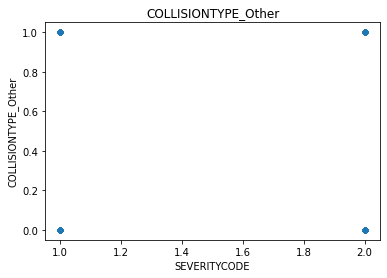

                     SEVERITYCODE  COLLISIONTYPE_Other
SEVERITYCODE             1.000000            -0.033384
COLLISIONTYPE_Other     -0.033384             1.000000
COLLISIONTYPE_Parked Car


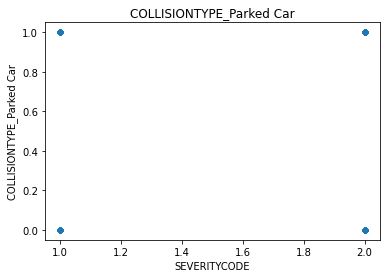

                          SEVERITYCODE  COLLISIONTYPE_Parked Car
SEVERITYCODE                  1.000000                 -0.304148
COLLISIONTYPE_Parked Car     -0.304148                  1.000000
COLLISIONTYPE_Pedestrian


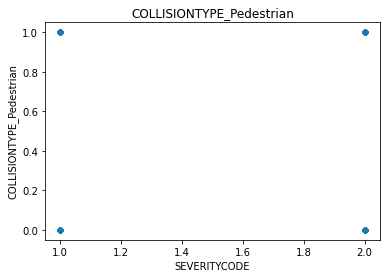

                          SEVERITYCODE  COLLISIONTYPE_Pedestrian
SEVERITYCODE                  1.000000                  0.245441
COLLISIONTYPE_Pedestrian      0.245441                  1.000000
COLLISIONTYPE_Rear Ended


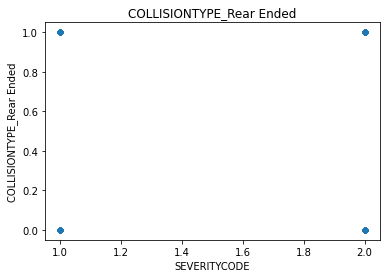

                          SEVERITYCODE  COLLISIONTYPE_Rear Ended
SEVERITYCODE                  1.000000                  0.132313
COLLISIONTYPE_Rear Ended      0.132313                  1.000000
COLLISIONTYPE_Right Turn


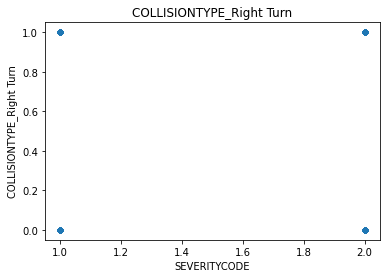

                          SEVERITYCODE  COLLISIONTYPE_Right Turn
SEVERITYCODE                  1.000000                 -0.025194
COLLISIONTYPE_Right Turn     -0.025194                  1.000000
COLLISIONTYPE_Sideswipe


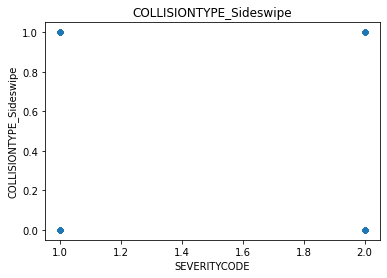

                         SEVERITYCODE  COLLISIONTYPE_Sideswipe
SEVERITYCODE                 1.000000                -0.116638
COLLISIONTYPE_Sideswipe     -0.116638                 1.000000
JUNCTIONTYPE_At Intersection (but not related to intersection)


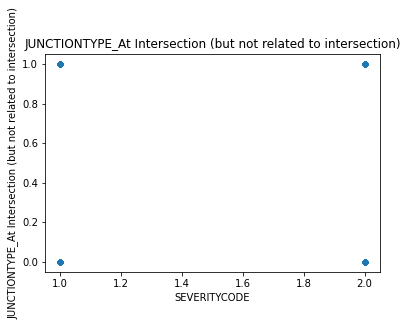

                                                    SEVERITYCODE  \
SEVERITYCODE                                            1.000000   
JUNCTIONTYPE_At Intersection (but not related t...     -0.000445   

                                                    JUNCTIONTYPE_At Intersection (but not related to intersection)  
SEVERITYCODE                                                                                -0.000445               
JUNCTIONTYPE_At Intersection (but not related t...                                           1.000000               
JUNCTIONTYPE_At Intersection (intersection related)


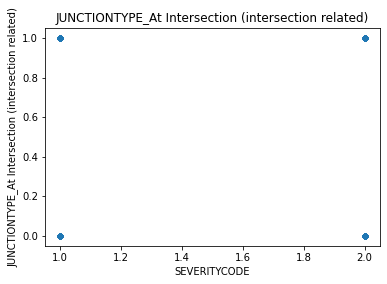

                                                    SEVERITYCODE  \
SEVERITYCODE                                            1.000000   
JUNCTIONTYPE_At Intersection (intersection rela...      0.201628   

                                                    JUNCTIONTYPE_At Intersection (intersection related)  
SEVERITYCODE                                                                                 0.201628    
JUNCTIONTYPE_At Intersection (intersection rela...                                           1.000000    
JUNCTIONTYPE_Driveway Junction


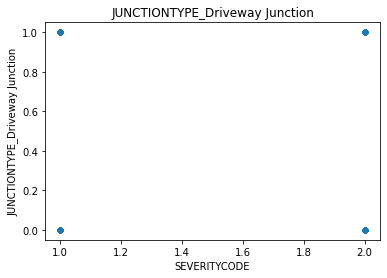

                                SEVERITYCODE  JUNCTIONTYPE_Driveway Junction
SEVERITYCODE                         1.00000                         0.00219
JUNCTIONTYPE_Driveway Junction       0.00219                         1.00000
JUNCTIONTYPE_Mid-Block (but intersection related)


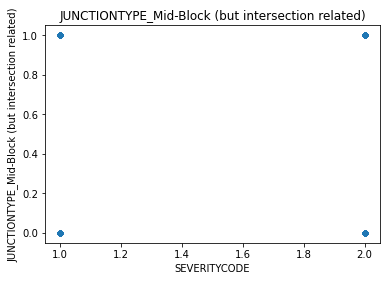

                                                   SEVERITYCODE  \
SEVERITYCODE                                           1.000000   
JUNCTIONTYPE_Mid-Block (but intersection related)      0.016929   

                                                   JUNCTIONTYPE_Mid-Block (but intersection related)  
SEVERITYCODE                                                                                0.016929  
JUNCTIONTYPE_Mid-Block (but intersection related)                                           1.000000  
JUNCTIONTYPE_Mid-Block (not related to intersection)


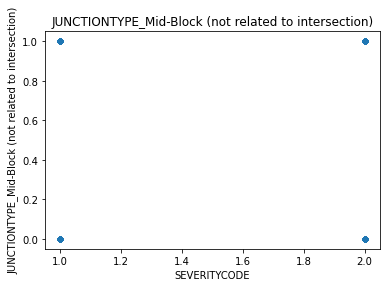

                                                    SEVERITYCODE  \
SEVERITYCODE                                            1.000000   
JUNCTIONTYPE_Mid-Block (not related to intersec...     -0.167415   

                                                    JUNCTIONTYPE_Mid-Block (not related to intersection)  
SEVERITYCODE                                                                                -0.167415     
JUNCTIONTYPE_Mid-Block (not related to intersec...                                           1.000000     
JUNCTIONTYPE_Ramp Junction


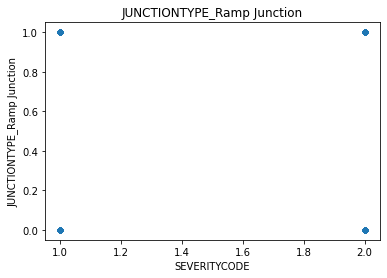

                            SEVERITYCODE  JUNCTIONTYPE_Ramp Junction
SEVERITYCODE                    1.000000                    0.001685
JUNCTIONTYPE_Ramp Junction      0.001685                    1.000000
JUNCTIONTYPE_Unknown


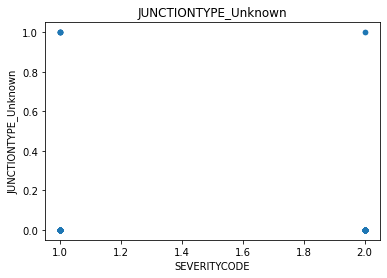

                      SEVERITYCODE  JUNCTIONTYPE_Unknown
SEVERITYCODE              1.000000             -0.001139
JUNCTIONTYPE_Unknown     -0.001139              1.000000
ROADCOND_Dry


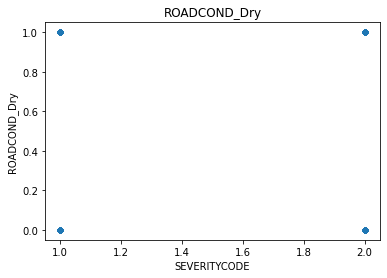

              SEVERITYCODE  ROADCOND_Dry
SEVERITYCODE      1.000000      0.066558
ROADCOND_Dry      0.066558      1.000000
ROADCOND_Ice


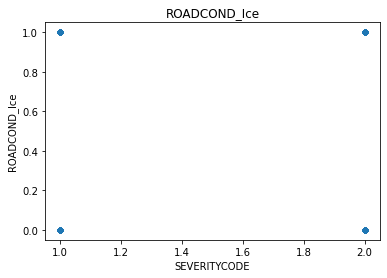

              SEVERITYCODE  ROADCOND_Ice
SEVERITYCODE      1.000000     -0.012623
ROADCOND_Ice     -0.012623      1.000000
ROADCOND_Oil


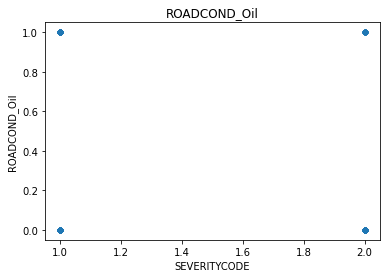

              SEVERITYCODE  ROADCOND_Oil
SEVERITYCODE      1.000000      0.003015
ROADCOND_Oil      0.003015      1.000000
ROADCOND_Other


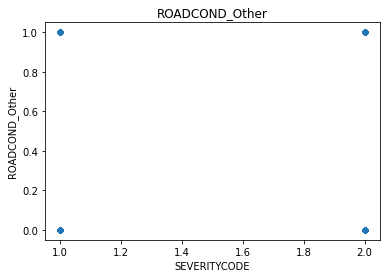

                SEVERITYCODE  ROADCOND_Other
SEVERITYCODE        1.000000        0.001528
ROADCOND_Other      0.001528        1.000000
ROADCOND_Sand/Mud/Dirt


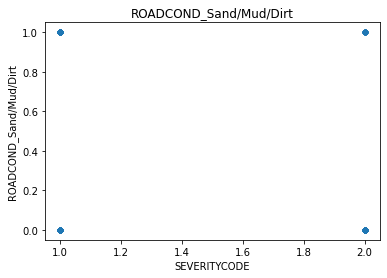

                        SEVERITYCODE  ROADCOND_Sand/Mud/Dirt
SEVERITYCODE                1.000000                0.000333
ROADCOND_Sand/Mud/Dirt      0.000333                1.000000
ROADCOND_Snow/Slush


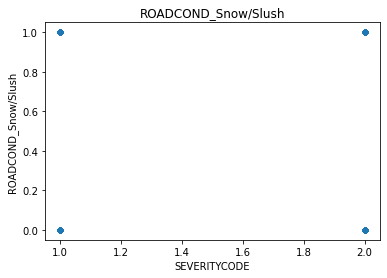

                     SEVERITYCODE  ROADCOND_Snow/Slush
SEVERITYCODE             1.000000            -0.020851
ROADCOND_Snow/Slush     -0.020851             1.000000
ROADCOND_Standing Water


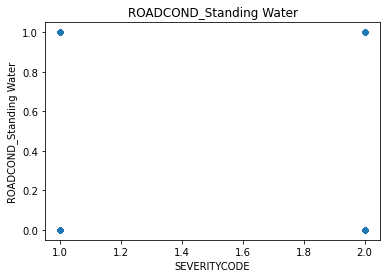

                         SEVERITYCODE  ROADCOND_Standing Water
SEVERITYCODE                  1.00000                 -0.00202
ROADCOND_Standing Water      -0.00202                  1.00000
ROADCOND_Unknown


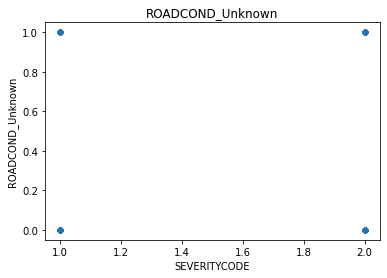

                  SEVERITYCODE  ROADCOND_Unknown
SEVERITYCODE          1.000000         -0.157748
ROADCOND_Unknown     -0.157748          1.000000
ROADCOND_Wet


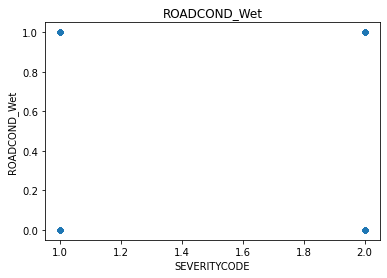

              SEVERITYCODE  ROADCOND_Wet
SEVERITYCODE      1.000000      0.040895
ROADCOND_Wet      0.040895      1.000000
LIGHTCOND_Dark - No Street Lights


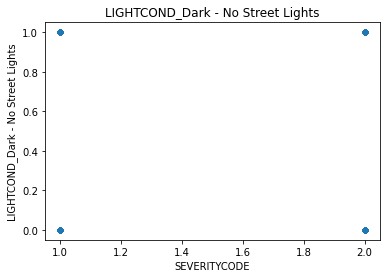

                                   SEVERITYCODE  \
SEVERITYCODE                           1.000000   
LIGHTCOND_Dark - No Street Lights     -0.015901   

                                   LIGHTCOND_Dark - No Street Lights  
SEVERITYCODE                                               -0.015901  
LIGHTCOND_Dark - No Street Lights                           1.000000  
LIGHTCOND_Dark - Street Lights Off


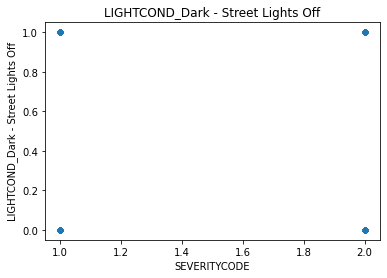

                                    SEVERITYCODE  \
SEVERITYCODE                            1.000000   
LIGHTCOND_Dark - Street Lights Off     -0.006079   

                                    LIGHTCOND_Dark - Street Lights Off  
SEVERITYCODE                                                 -0.006079  
LIGHTCOND_Dark - Street Lights Off                            1.000000  
LIGHTCOND_Dark - Street Lights On


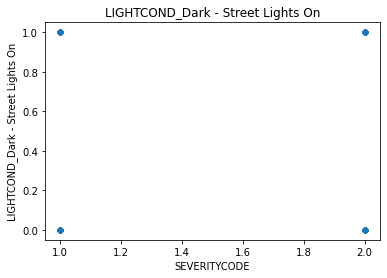

                                   SEVERITYCODE  \
SEVERITYCODE                           1.000000   
LIGHTCOND_Dark - Street Lights On     -0.000618   

                                   LIGHTCOND_Dark - Street Lights On  
SEVERITYCODE                                               -0.000618  
LIGHTCOND_Dark - Street Lights On                           1.000000  
LIGHTCOND_Dark - Unknown Lighting


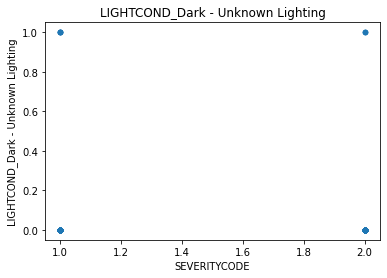

                                   SEVERITYCODE  \
SEVERITYCODE                           1.000000   
LIGHTCOND_Dark - Unknown Lighting      0.001063   

                                   LIGHTCOND_Dark - Unknown Lighting  
SEVERITYCODE                                                0.001063  
LIGHTCOND_Dark - Unknown Lighting                           1.000000  
LIGHTCOND_Dawn


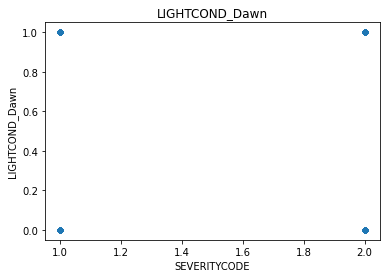

                SEVERITYCODE  LIGHTCOND_Dawn
SEVERITYCODE        1.000000        0.007586
LIGHTCOND_Dawn      0.007586        1.000000
LIGHTCOND_Daylight


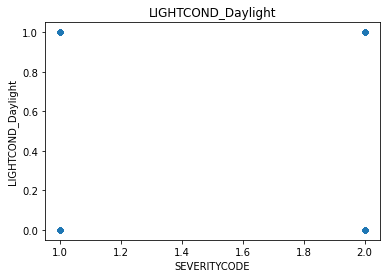

                    SEVERITYCODE  LIGHTCOND_Daylight
SEVERITYCODE            1.000000            0.087616
LIGHTCOND_Daylight      0.087616            1.000000
LIGHTCOND_Dusk


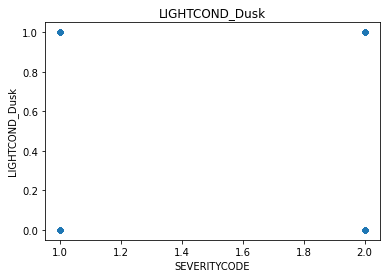

                SEVERITYCODE  LIGHTCOND_Dusk
SEVERITYCODE        1.000000        0.011773
LIGHTCOND_Dusk      0.011773        1.000000
LIGHTCOND_Other


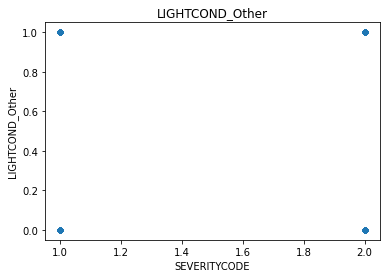

                 SEVERITYCODE  LIGHTCOND_Other
SEVERITYCODE         1.000000        -0.005895
LIGHTCOND_Other     -0.005895         1.000000
LIGHTCOND_Unknown


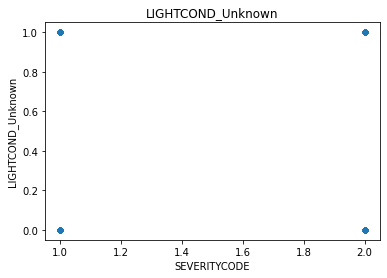

                   SEVERITYCODE  LIGHTCOND_Unknown
SEVERITYCODE           1.000000          -0.151296
LIGHTCOND_Unknown     -0.151296           1.000000


In [17]:
df_ordem = pd.DataFrame()
for col in df_data_2.columns[1:]:
    if(df_data_2[col].dtypes!='object'):
        print(col)
        df_data_2[['SEVERITYCODE',col]].plot.scatter(x='SEVERITYCODE',y=col,title=col)
        plt.show()
        print(df_data_2[['SEVERITYCODE',col]].corr())
        df_ordem = df_ordem.append(pd.DataFrame({'col':[col],'corr':[abs(df_data_2[['SEVERITYCODE',col]].corr()['SEVERITYCODE'][col])]}))

In [50]:
df_ordem.sort_values('corr',ascending=False)[1:16]

,col,corr
0,COLLISIONTYPE_Parked Car,0.304148
0,PEDCOUNT,0.246338
0,COLLISIONTYPE_Pedestrian,0.245441
0,PEDCYLCOUNT,0.214218
0,COLLISIONTYPE_Cycles,0.213271
0,PEDROWNOTGRNT,0.206283
0,JUNCTIONTYPE_At Intersection (intersection rel...,0.201628
0,ADDRTYPE_Intersection,0.199089
0,SDOT_COLCODE,0.188905
0,ADDRTYPE_Block,0.184745


In [51]:
list(df_ordem.sort_values('corr',ascending=False)[1:16]['col'])

['COLLISIONTYPE_Parked Car',
 'PEDCOUNT',
 'COLLISIONTYPE_Pedestrian',
 'PEDCYLCOUNT',
 'COLLISIONTYPE_Cycles',
 'PEDROWNOTGRNT',
 'JUNCTIONTYPE_At Intersection (intersection related)',
 'ADDRTYPE_Intersection',
 'SDOT_COLCODE',
 'ADDRTYPE_Block',
 'CROSSWALKKEY',
 'JUNCTIONTYPE_Mid-Block (not related to intersection)',
 'ROADCOND_Unknown',
 'LIGHTCOND_Unknown',
 'COLLISIONTYPE_Rear Ended']

In [44]:
X = df_data_2[list(df_ordem.sort_values('corr',ascending=False)[1:16]['col'])]
y = df_data_2['SEVERITYCODE']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
print(len(X_train),len(X_test))

146004 48669


In [47]:
logisticRegr = LogisticRegression().fit(X_train,y_train)

In [48]:
print('Train = {}'.format(logisticRegr.score(X_train,y_train)))
print('Teste = {}'.format(logisticRegr.score(X_test, y_test)))

Train = 0.7154119065231089
Teste = 0.7154246029299965


In [49]:
metrics.confusion_matrix(y_test,logisticRegr.predict(X_test)) 

array([[34041,   101],
       [13749,   778]])